In [10]:
import pandas as pd
from pandas_datareader.data import data # financial data lib
import matplotlib.pyplot as plt

%matplotlib inline 
#for charts to appear directly under respective cell instead of at the end. 

### Use the plot Method to Render a Line chart

In [15]:
bb = data.DataReader('bb', 'stooq', start = '2007-01-01', end = '2020-12-31')
bb.head(3)
# Pulling blackberry stock data using lib

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,6.68,6.80,6.630,6.63,7530565.0
2020-12-30,6.79,6.81,6.600,6.67,9434913.0
2020-12-29,6.98,7.00,6.675,6.77,11284185.0


<AxesSubplot: xlabel='Date'>

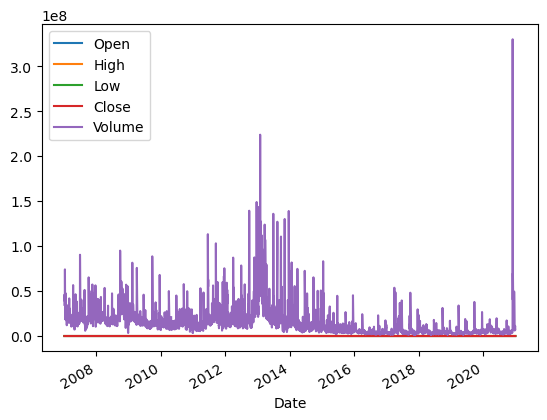

In [17]:
bb.plot() # plotting the results using Line chart, targets all columns by default, need to adjust scale.

<AxesSubplot: xlabel='Date'>

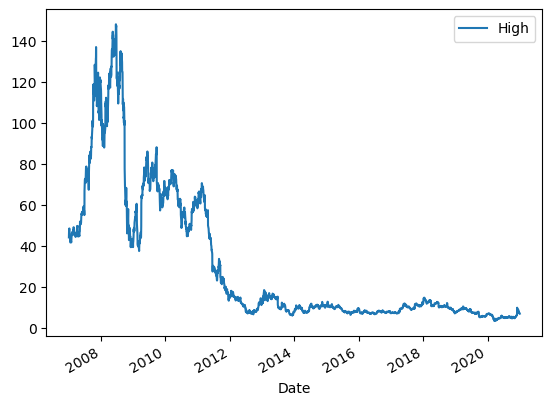

In [18]:
bb.plot(y = 'High') # plotting the 'High' column only

# another way would be bb['High'].plot()

<AxesSubplot: xlabel='Date'>

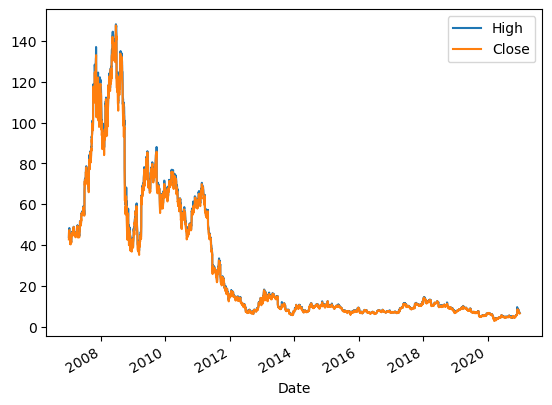

In [21]:
bb[['High', 'Close']].plot() # plots 2 cols in the Line chart

### Modifying Plot Aesthetics with matplotlib Templates

In [23]:
plt.style.available # these are available templates or themes (pre-defined colors)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<AxesSubplot: xlabel='Date'>

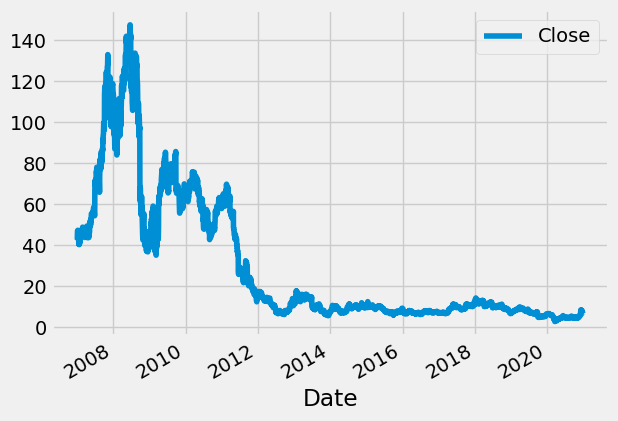

In [25]:
plt.style.use('fivethirtyeight') # Using one of the themes
bb.plot(y = 'Close')

<AxesSubplot: xlabel='Date'>

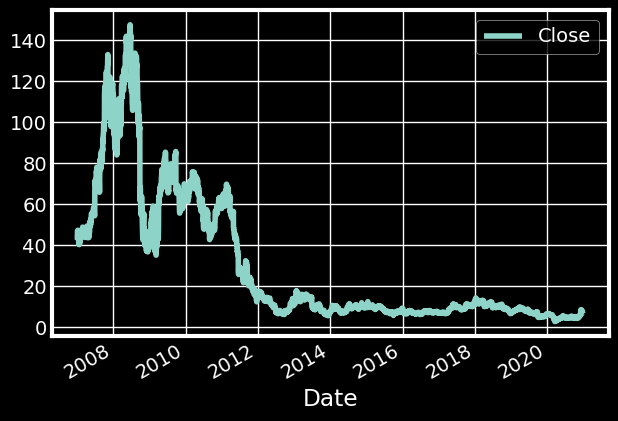

In [26]:
plt.style.use('dark_background')
bb.plot(y = 'Close')

### Creating Bar Graphs to show Counts

In [27]:
bb = data.DataReader('bb', 'stooq', start = '2007-01-01', end = '2020-12-31')
bb.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,6.68,6.80,6.630,6.63,7530565.0
2020-12-30,6.79,6.81,6.600,6.67,9434913.0
2020-12-29,6.98,7.00,6.675,6.77,11284185.0


In [35]:
# We want to label stock prices as Poor, Decent, Good -> based on closing prices

def rank_performance(price):
    if price <= 10:
        return 'Poor'
    elif 10 < price <= 50:
        return 'Decent'
    else:
        return 'Good'

In [36]:
bb['Close'].apply(rank_performance).value_counts() # getting the results -> counts

Poor      1541
Decent    1125
Good       859
Name: Close, dtype: int64

<AxesSubplot: >

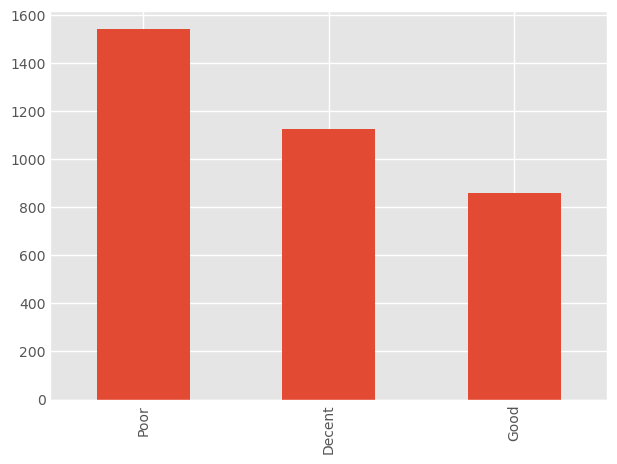

In [41]:
# Plotting a bar graph based on results -> gives the count of each level.

plt.style.use('ggplot')
bb['Close'].apply(rank_performance).value_counts().plot(kind = 'bar') # kind = 'barh' -> horizontal bar graphs

### Creating Pie Charts

In [43]:
# We want to show the ratio(composition) between above average stock price days and below average stock price days using 
# pie charts 
def rank_performance(stock_price):
    if stock_price <= bb['Close'].mean():
        return 'Below average'
    elif stock_price > bb['Close'].mean():
        return 'Above average'

<AxesSubplot: ylabel='Close'>

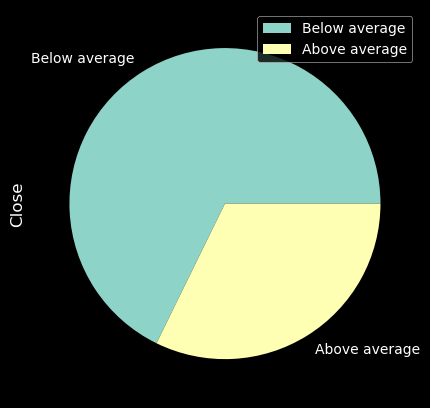

In [47]:
plt.style.use('dark_background')
bb['Close'].apply(rank_performance).value_counts().plot(kind = 'pie', legend = True) 

# creates a pie chart with defined style and legend 